In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

print("✅ Setup complete!")

✅ Setup complete!


## 1. Load EAP Datasets (Already Filtered)

In [2]:
# Load pre-filtered EAP datasets
gini_eap = pd.read_csv('../data/east_asia_pacific/gini_index_eap_2000_2024.csv')
poverty_eap = pd.read_csv('../data/east_asia_pacific/poverty_headcount_eap_2000_2024.csv')

print("📊 Gini Index EAP:")
print(f"Shape: {gini_eap.shape}")
print(f"\nColumns: {list(gini_eap.columns)}\n")
display(gini_eap.head())

print("\n" + "="*80 + "\n")
print("📊 Poverty Headcount EAP:")
print(f"Shape: {poverty_eap.shape}")
print(f"\nColumns: {list(poverty_eap.columns)}\n")
display(poverty_eap.head())

📊 Gini Index EAP:
Shape: (24, 26)

Columns: ['country_code', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']



,country_code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,AUS,NaN,33.5,NaN,33.5,33.1,NaN,NaN,NaN,35.4,NaN,34.7,NaN,NaN,NaN,34.4,NaN,33.7,NaN,34.3,NaN,33.8,NaN,NaN,NaN,NaN
1,CHN,NaN,NaN,42.0,NaN,NaN,40.9,NaN,NaN,43.0,NaN,43.7,42.4,42.2,39.7,39.2,38.6,38.5,39.1,38.5,38.2,37.1,35.7,36.0,NaN,NaN
2,FJI,NaN,NaN,38.1,NaN,NaN,NaN,NaN,NaN,40.4,NaN,NaN,NaN,NaN,36.7,NaN,NaN,NaN,NaN,NaN,30.7,NaN,NaN,NaN,NaN,NaN
3,FSM,NaN,NaN,NaN,NaN,NaN,42.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDN,30.3,31.2,30.2,29.3,30.4,29.9,31.5,33.2,32.6,33.4,34.6,37.9,37.1,38.9,38.8,38.2,36.9,36.4,36.3,35.4,35.3,35.5,35.5,36.1,34.9




📊 Poverty Headcount EAP:
Shape: (164, 6)

Columns: ['country_code', 'country_name', 'year', 'poverty_215', 'poverty_365', 'poverty_685']



,country_code,country_name,year,poverty_215,poverty_365,poverty_685
0,AUS,Australia,2001,1.0,1.0,1.7
1,AUS,Australia,2003,1.0,1.2,2.0
2,AUS,Australia,2004,0.7,0.7,1.2
3,AUS,Australia,2008,0.7,0.7,1.0
4,AUS,Australia,2010,0.3,0.7,1.0


In [3]:
# Get list of EAP countries
eap_countries = poverty_eap['country_code'].unique()
print(f"📍 EAP Countries ({len(eap_countries)}):")
print(sorted(eap_countries))

📍 EAP Countries (24):
['AUS', 'CHN', 'FJI', 'FSM', 'IDN', 'JPN', 'KIR', 'KOR', 'LAO', 'MHL', 'MMR', 'MNG', 'MYS', 'NRU', 'PHL', 'PNG', 'SLB', 'THA', 'TLS', 'TON', 'TUV', 'VNM', 'VUT', 'WSM']


## 2. Load and Filter Global Datasets for EAP

In [4]:
# Function to transform wide format to long format and filter for EAP
def transform_and_filter_eap(df, value_name, eap_countries, start_year=2000, end_year=2024):
    """
    Transform wide format (years as columns) to long format and filter for EAP countries
    """
    # Filter for EAP countries
    df_eap = df[df['country_code'].isin(eap_countries)].copy()
    
    # Get year columns
    year_cols = [col for col in df_eap.columns if col.isdigit()]
    year_cols = [col for col in year_cols if start_year <= int(col) <= end_year]
    
    # Melt to long format
    id_cols = [col for col in df_eap.columns if not col.isdigit()]
    df_long = df_eap.melt(
        id_vars=id_cols,
        value_vars=year_cols,
        var_name='year',
        value_name=value_name
    )
    
    # Convert year to int
    df_long['year'] = df_long['year'].astype(int)
    
    # Sort
    df_long = df_long.sort_values(['country_code', 'year']).reset_index(drop=True)
    
    print(f"✅ {value_name}: {df.shape} → {df_long.shape} | Years: {df_long['year'].min()}-{df_long['year'].max()} | Countries: {df_long['country_code'].nunique()}")
    
    return df_long

print("📝 Function ready!")

📝 Function ready!


In [5]:
# Load global datasets
print("📂 Loading global datasets...\n")

gdp = pd.read_csv('../data/gdp.csv')
cpi = pd.read_csv('../data/cpi.csv')
pop = pd.read_csv('../data/pop.csv')
pce = pd.read_csv('../data/PCE.csv')

print(f"GDP: {gdp.shape}")
print(f"CPI: {cpi.shape}")
print(f"Population: {pop.shape}")
print(f"PCE: {pce.shape}")

📂 Loading global datasets...

GDP: (221, 51)
CPI: (173, 50)
Population: (650, 51)
PCE: (186, 50)


In [6]:
# Transform and filter for EAP (2000-2024)
print("🔄 Transforming and filtering for EAP...\n")

gdp_eap = transform_and_filter_eap(gdp, 'gdp', eap_countries)
cpi_eap = transform_and_filter_eap(cpi, 'cpi', eap_countries)
pop_eap = transform_and_filter_eap(pop, 'population', eap_countries)
pce_eap = transform_and_filter_eap(pce, 'pce', eap_countries)

🔄 Transforming and filtering for EAP...

✅ gdp: (221, 51) → (700, 4) | Years: 2000-2024 | Countries: 24
✅ cpi: (173, 50) → (625, 4) | Years: 2000-2024 | Countries: 24
✅ population: (650, 51) → (1800, 4) | Years: 2000-2024 | Countries: 24
✅ pce: (186, 50) → (575, 4) | Years: 2000-2024 | Countries: 19


## 3. Export EAP Datasets to CSV

In [7]:
# Export to CSV (national level only)
print("💾 Exporting EAP datasets...\n")

gdp_eap_national = gdp_eap[gdp_eap['data_level'] == 'national'].drop('data_level', axis=1)
cpi_eap_national = cpi_eap[cpi_eap['data_level'] == 'national'].drop('data_level', axis=1)
pop_eap_national = pop_eap[pop_eap['data_level'] == 'national'].drop('data_level', axis=1)
pce_eap_national = pce_eap[pce_eap['data_level'] == 'national'].drop('data_level', axis=1)

gdp_eap_national.to_csv('../data/east_asia_pacific/gdp_eap_2000_2024.csv', index=False)
print(f"✅ gdp_eap_2000_2024.csv ({gdp_eap_national.shape})")

cpi_eap_national.to_csv('../data/east_asia_pacific/cpi_eap_2000_2024.csv', index=False)
print(f"✅ cpi_eap_2000_2024.csv ({cpi_eap_national.shape})")

pop_eap_national.to_csv('../data/east_asia_pacific/pop_eap_2000_2024.csv', index=False)
print(f"✅ pop_eap_2000_2024.csv ({pop_eap_national.shape})")

pce_eap_national.to_csv('../data/east_asia_pacific/pce_eap_2000_2024.csv', index=False)
print(f"✅ pce_eap_2000_2024.csv ({pce_eap_national.shape})")

print("\n✅ All EAP datasets exported!")

💾 Exporting EAP datasets...

✅ gdp_eap_2000_2024.csv ((600, 3))
✅ cpi_eap_2000_2024.csv ((575, 3))
✅ pop_eap_2000_2024.csv ((600, 3))
✅ pce_eap_2000_2024.csv ((475, 3))

✅ All EAP datasets exported!


## 4. Merge All Datasets

In [8]:
# Transform Gini from wide to long format
year_cols = [col for col in gini_eap.columns if col.isdigit()]
gini_long = gini_eap.melt(
    id_vars=['country_code'],
    value_vars=year_cols,
    var_name='year',
    value_name='gini_index'
)
gini_long['year'] = gini_long['year'].astype(int)
gini_long = gini_long.sort_values(['country_code', 'year']).reset_index(drop=True)

print(f"Gini transformed: {gini_eap.shape} → {gini_long.shape}")

Gini transformed: (24, 26) → (600, 3)


In [9]:
# Merge all datasets
print("🔗 Merging datasets...\n")

df_merged = poverty_eap.copy()
print(f"Starting: {df_merged.shape}")

df_merged = df_merged.merge(gini_long, on=['country_code', 'year'], how='left')
print(f"+ Gini: {df_merged.shape}")

df_merged = df_merged.merge(gdp_eap_national, on=['country_code', 'year'], how='left')
print(f"+ GDP: {df_merged.shape}")

df_merged = df_merged.merge(cpi_eap_national, on=['country_code', 'year'], how='left')
print(f"+ CPI: {df_merged.shape}")

df_merged = df_merged.merge(pop_eap_national, on=['country_code', 'year'], how='left')
print(f"+ Population: {df_merged.shape}")

df_merged = df_merged.merge(pce_eap_national, on=['country_code', 'year'], how='left')
print(f"+ PCE: {df_merged.shape}")

print(f"\n✅ Final: {df_merged.shape}")
print(f"Columns: {list(df_merged.columns)}")

🔗 Merging datasets...

Starting: (164, 6)
+ Gini: (164, 7)
+ GDP: (164, 8)
+ CPI: (164, 9)
+ Population: (164, 10)
+ PCE: (164, 11)

✅ Final: (164, 11)
Columns: ['country_code', 'country_name', 'year', 'poverty_215', 'poverty_365', 'poverty_685', 'gini_index', 'gdp', 'cpi', 'population', 'pce']


## 5. Feature Engineering

In [10]:
# Create derived features
print("🔧 Feature engineering...\n")

df_fe = df_merged.copy()

# GDP per capita
df_fe['gdp_per_capita'] = df_fe['gdp'] / df_fe['population']
print("✅ gdp_per_capita")

# Sort for time-series features
df_fe = df_fe.sort_values(['country_code', 'year']).reset_index(drop=True)

# Growth rates
for col in ['gdp', 'population', 'cpi', 'gdp_per_capita']:
    if col in df_fe.columns:
        df_fe[f'{col}_growth'] = df_fe.groupby('country_code')[col].pct_change() * 100
        print(f"✅ {col}_growth")

# Poverty gaps
df_fe['poverty_gap_215_365'] = df_fe['poverty_365'] - df_fe['poverty_215']
df_fe['poverty_gap_365_685'] = df_fe['poverty_685'] - df_fe['poverty_365']
print("✅ poverty_gap features")

# Time features
df_fe['years_since_2000'] = df_fe['year'] - 2000
df_fe['decade'] = (df_fe['year'] // 10) * 10
print("✅ time features")

print(f"\nFinal shape: {df_fe.shape}")

🔧 Feature engineering...

✅ gdp_per_capita
✅ gdp_growth
✅ population_growth
✅ cpi_growth
✅ gdp_per_capita_growth
✅ poverty_gap features
✅ time features

Final shape: (164, 20)


## 6. Handle Missing Values

🔍 Missing Values:

                       Count        Pct
cpi_growth                39  23.780488
gdp_growth                24  14.634146
population_growth         24  14.634146
gdp_per_capita_growth     24  14.634146
pce                       16   9.756098
cpi                       16   9.756098


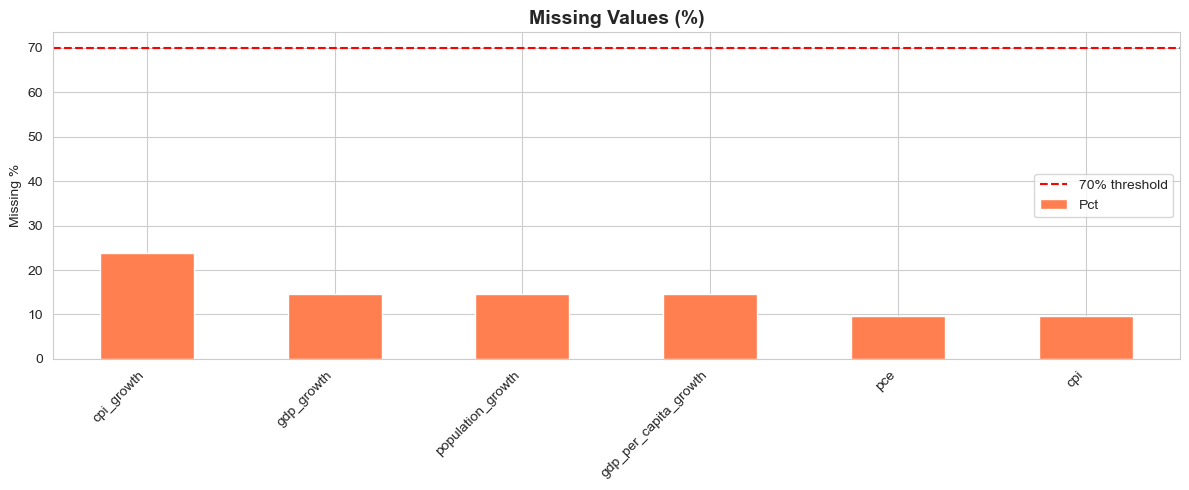

In [11]:
# Missing values analysis
missing = df_fe.isnull().sum()
missing_pct = (missing / len(df_fe)) * 100
missing_df = pd.DataFrame({'Count': missing, 'Pct': missing_pct})
missing_df = missing_df[missing_df['Count'] > 0].sort_values('Count', ascending=False)

if len(missing_df) > 0:
    print("🔍 Missing Values:\n")
    print(missing_df)
    
    # Visualize
    fig, ax = plt.subplots(figsize=(12, 5))
    missing_df['Pct'].plot(kind='bar', color='coral', ax=ax)
    ax.set_title('Missing Values (%)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Missing %')
    ax.axhline(y=70, color='red', linestyle='--', label='70% threshold')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values!")

In [12]:
# Handle missing values
df_clean = df_fe.copy()

# Drop columns with >70% missing
threshold = 70
missing_pct = (df_clean.isnull().sum() / len(df_clean)) * 100
cols_to_drop = missing_pct[missing_pct > threshold].index.tolist()

if cols_to_drop:
    print(f"🗑️ Dropping: {cols_to_drop}")
    df_clean = df_clean.drop(columns=cols_to_drop)

# Interpolate numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean.groupby('country_code')[col].transform(
            lambda x: x.interpolate(method='linear', limit_direction='both')
        )

print(f"✅ Shape: {df_fe.shape} → {df_clean.shape}")
print(f"Remaining missing: {df_clean.isnull().sum().sum()}")

✅ Shape: (164, 20) → (164, 20)
Remaining missing: 59


## 7. Export Final Dataset

In [13]:
# Export
output_file = '../data/eap_merged_preprocessed.csv'
df_clean.to_csv(output_file, index=False)

print(f"💾 Saved: {output_file}")
print(f"\n📊 Summary:")
print(f"  Shape: {df_clean.shape}")
print(f"  Countries: {df_clean['country_code'].nunique()}")
print(f"  Years: {df_clean['year'].min()}-{df_clean['year'].max()}")
print(f"  Features: {df_clean.shape[1]}")

print("\n✅ Preprocessing complete!")
print("\n📝 Next: EDA → Clustering → Classification → Research Questions")

💾 Saved: ../data/eap_merged_preprocessed.csv

📊 Summary:
  Shape: (164, 20)
  Countries: 24
  Years: 2000-2024
  Features: 20

✅ Preprocessing complete!

📝 Next: EDA → Clustering → Classification → Research Questions


In [14]:
# Sample data
display(df_clean.head(10))
print("\nStatistics:\n")
display(df_clean.describe())

,country_code,country_name,year,poverty_215,poverty_365,poverty_685,gini_index,gdp,cpi,population,pce,gdp_per_capita,gdp_growth,population_growth,cpi_growth,gdp_per_capita_growth,poverty_gap_215_365,poverty_gap_365_685,years_since_2000,decade
0,AUS,Australia,2001,1.0,1.0,1.7,33.5,46838.796279,0.624869,19274701,24752.138731,0.002430,4.930265,2.314101,5.795645,2.556992,0.0,0.7,1,2000
1,AUS,Australia,2003,1.0,1.2,2.0,33.5,49148.072825,0.661084,19720737,26285.554292,0.002492,4.930265,2.314101,5.795645,2.556992,0.2,0.8,3,2000
2,AUS,Australia,2004,0.7,0.7,1.2,33.1,50377.608188,0.676575,19932722,27264.441221,0.002527,2.501696,1.074934,2.343255,1.411588,0.0,0.5,4,2000
3,AUS,Australia,2008,0.7,0.7,1.0,35.4,53286.554490,0.768265,21249199,29718.518866,0.002508,5.774284,6.604602,13.551980,-0.778876,0.0,0.3,8,2000
4,AUS,Australia,2010,0.3,0.7,1.0,34.7,53845.084873,0.804689,22031750,30413.336020,0.002444,1.048164,3.682732,4.741144,-2.540990,0.4,0.3,10,2010
5,AUS,Australia,2014,0.5,0.7,1.0,34.4,56533.439920,0.888214,23475686,31627.304073,0.002408,4.992758,6.553887,10.379813,-1.465107,0.2,0.3,14,2010
6,AUS,Australia,2016,0.5,0.5,1.0,33.7,57575.857225,0.913125,24190907,32282.790088,0.002380,1.843895,3.046646,2.804619,-1.167191,0.0,0.5,16,2010
7,AUS,Australia,2018,0.5,0.7,1.2,34.3,58727.757908,0.948713,24963258,32855.689882,0.002353,2.000666,3.192733,3.897295,-1.155185,0.2,0.5,18,2010
8,AUS,Australia,2020,1.0,1.0,1.5,33.8,58704.650815,0.972158,25649248,31536.841005,0.002289,-0.039346,2.747999,2.471315,-2.712797,0.0,0.5,20,2020
9,CHN,China,2002,48.1,64.0,89.3,42.0,2610.729603,NaN,1280400000,955.872848,0.000002,32.752827,1.821306,NaN,30.378240,15.9,25.3,2,2000



Statistics:



,year,poverty_215,poverty_365,poverty_685,gini_index,gdp,cpi,population,pce,gdp_per_capita,gdp_growth,population_growth,cpi_growth,gdp_per_capita_growth,poverty_gap_215_365,poverty_gap_365_685,years_since_2000,decade
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,148.000000,1.640000e+02,153.000000,164.000000,160.000000,160.000000,144.000000,160.000000,164.000000,164.000000,164.000000,164.000000
mean,2012.286585,11.714634,21.185366,45.217073,36.457927,10965.586572,0.786170,2.093158e+08,6193.844769,0.008755,7.396243,3.124396,13.588934,4.254647,9.470732,24.031707,12.286585,2008.048780
std,6.261936,16.217707,23.964793,32.731056,4.375335,14459.318350,0.217185,3.909902e+08,8043.155610,0.055747,9.937528,5.087049,18.857448,9.163941,8.757748,14.786902,6.261936,6.634919
min,2000.000000,0.000000,0.100000,0.500000,27.100000,961.848462,0.205762,1.026700e+04,147.279530,0.000002,-19.361171,-2.953901,-1.610685,-34.819858,0.000000,0.300000,0.000000,2000.000000
25%,2008.000000,0.575000,1.200000,15.000000,33.075000,2704.387383,0.659069,1.987973e+07,1613.714505,0.000017,2.199203,0.581036,2.414278,1.015360,0.675000,13.525000,8.000000,2000.000000
50%,2012.500000,3.450000,10.350000,45.950000,35.850000,4219.328559,0.840560,7.070032e+07,2520.020688,0.000089,4.879218,1.331105,7.226226,3.259156,6.750000,27.200000,12.500000,2010.000000
75%,2018.000000,18.900000,38.250000,74.300000,39.225000,9328.305477,0.967382,1.500719e+08,4578.942835,0.000931,9.607155,3.727884,16.222837,6.280744,16.975000,35.750000,18.000000,2010.000000
max,2024.000000,65.700000,84.300000,98.500000,47.700000,58727.757908,1.151480,1.412360e+09,32855.689882,0.649787,43.023197,23.899937,90.637645,36.632521,27.500000,52.900000,24.000000,2020.000000
